# Markov Grouping
We have a growing list of requirements:

- Variable group sizes. We can't rely on a fixed number of brackets per group.
- Flash frames. We need photometric invariance.
- Exposure extrema. Furhter need for photometric invariance.
- Weak translation invariance. We need to accommodate small shifts.
- Feature sensitivity. We need to not group images with dissimilar features. Doors open and closed.
- Performance. We can't spend too much time evaluating image similarity.

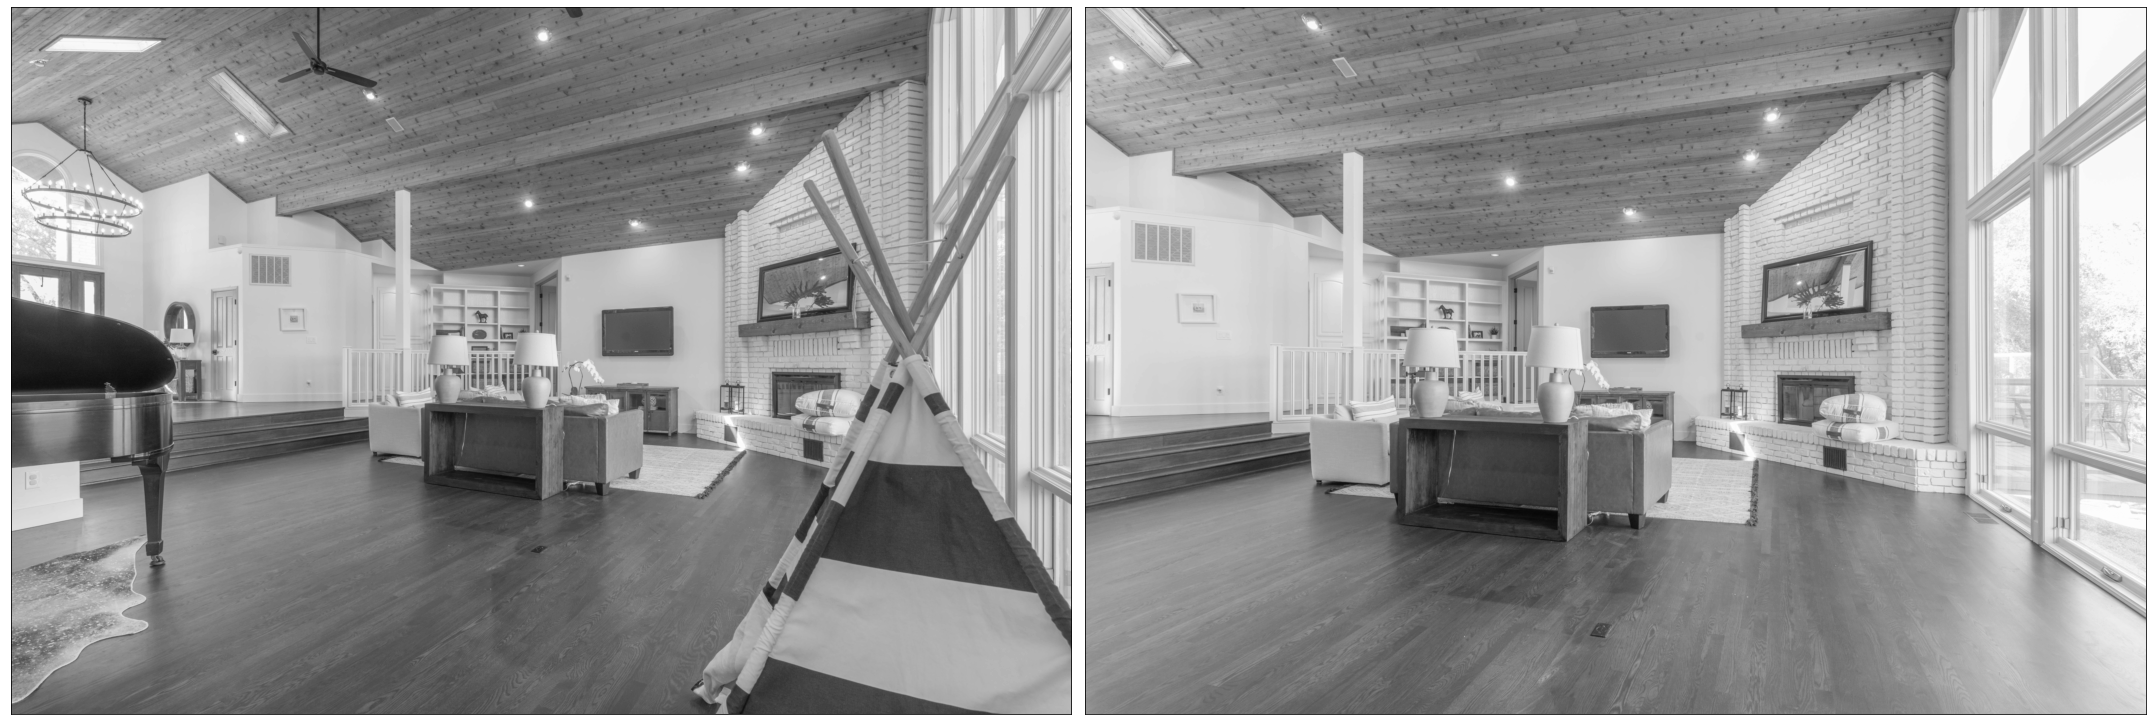

In [4]:
from cv2 import imread
from matplotlib import pyplot as plt

# Load image
# image_a = imread("../test/media/group/22.jpg", 0)
# image_b = imread("../test/media/group/23.jpg", 0)
image_a = imread("/Users/yusuf/Desktop/Clarksville/5.jpg", 0)
image_b = imread("/Users/yusuf/Desktop/Clarksville/6.jpg", 0)

# Plot
plt.figure(figsize=(30, 20))
plt.gray()
plt.subplot(1, 2, 1)
plt.xticks([])
plt.yticks([])
plt.imshow(image_a, interpolation="bilinear")
plt.subplot(1, 2, 2)
plt.xticks([])
plt.yticks([])
plt.imshow(image_b, interpolation="bilinear")
plt.tight_layout()
plt.show()

Next, we extract patches from the images.

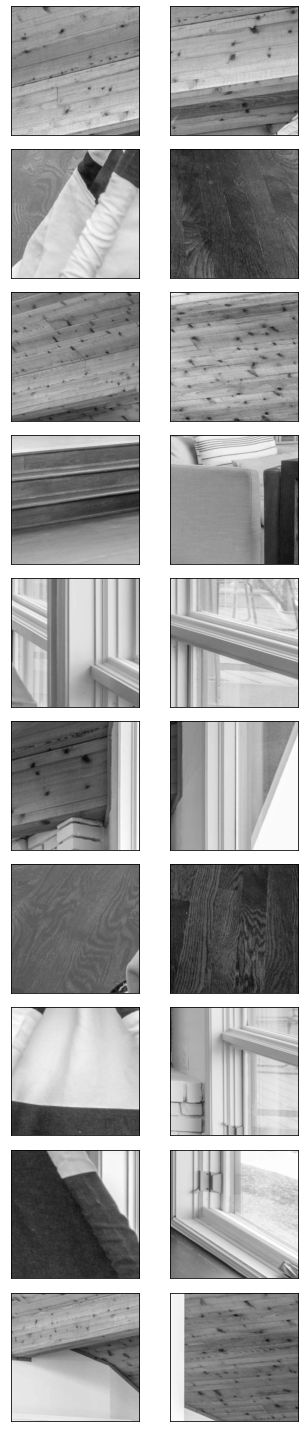

In [5]:
from sklearn.feature_extraction.image import extract_patches_2d

# Compute patch size
PATCH_SIZE = 0.1 # of lower of width/height
patch_width = int(min(image_a.shape[0], image_a.shape[1]) * PATCH_SIZE)

# Extract patches
SEED = 1
PATCH_COUNT = 100
patches_a = extract_patches_2d(image_a, (patch_width, patch_width), PATCH_COUNT, SEED)
patches_b = extract_patches_2d(image_b, (patch_width, patch_width), PATCH_COUNT, SEED)

# Plot
PLOT_COUNT = 10
plt.figure(figsize=(5, 20))
plt.gray()
for i in range(PLOT_COUNT):
    plt.subplot(PLOT_COUNT, 2, 2 * i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(patches_a[i], interpolation="bilinear")
    plt.subplot(PLOT_COUNT, 2, 2 * i + 2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(patches_b[i], interpolation="bilinear")
plt.tight_layout()
plt.show()

Next, we compute the relative transform between both images using the Enhanced Correlation Coefficient.

In [6]:
from cv2 import findTransformECC, MOTION_TRANSLATION, TERM_CRITERIA_COUNT, TERM_CRITERIA_EPS
from numpy import eye, float32

# Constants
IDENTITY = eye(2, 3, dtype=float32)
CRITERIA = (TERM_CRITERIA_EPS | TERM_CRITERIA_COUNT, 100, 1e-4)

# Estimate transform
passes, misses = 0, 0
for i, (patch_a, patch_b) in enumerate(zip(patches_a, patches_b)):
    try:
        findTransformECC(patch_a, patch_b, IDENTITY.copy(), MOTION_TRANSLATION, CRITERIA, None, 5)
        passes += 1
    except:
        misses += 1
# Log
print(f"Passes: {passes} Misses: {misses}")

Passes: 56 Misses: 44
